In [7]:
import pandas as pd
import numpy as np
import geopandas as gpd
import urbanpy as up
import contextily as cx
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Mapa de Oferta Alimentaria Saludable en Lima, Peru

Ferias organizadas por promotores que controlan una oferta realmente ecológica:

- Feria Ecológica de Barranco (Calle San Martín cuadra 7, Barranco / domingos), -12.138176, -77.0229817
- Ecoferia de Cieneguilla (Frente parque Simón Bolívar; III etapa Cieneguilla / domingos), -12.0943875, -76.7749452
- BioFeria de Miraflores (parque Reducto / sábados), -12.1270848, -77.022242
- BioFeria de Surquillo (jirón Narciso de la Colina 580 / domingos), -12.118381, -77.025619

Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales - AgroFerias Campesinas:

- sede Puericultorio Pérez Araníbar (jirón Antonio Raymondi 141, Magdalena del Mar / viernes, sábados, domingos), -12.0990915, -77.06884
- sede San Isidro (avenida Aramburú cruce con calle 3, San Isidro / sábados), -12.1021172, -77.0162924
- sede Parque de la Familia, San Borja (Av. San Borja Sur con jirón Frederic Remington / domingos), -12.098735230950824, -77.01049887420028

Bioferias de vecindarios alimentarios:

- BioFeria Casablanca, Pachacamac
- BioFeria Tungasuca, Carabayllo

Biotiendas:

- Flora y Fauna Miraflores, Avenida Mariscal La Mar 1110, -12.1108903, -77.0478323
- Flora y Fauna San Borja, Av. Aviación 3110, -12.1013079!4d-77.001902
- Flora y Fauna Surco, Av. Primavera 654, -12.1111641!4d-76.9865775
- Flora y Fauna La Molina, Av. Raúl Ferrero 1415, Lima 15024, Perú, -12.0915649!4d-76.9522467
- Flora y Fauna Miraflores 2*, Av. Alfredo Benavides 2150, Miraflores 15048, Perú, -12.1276912!4d-77.0101165

- Vacas Felices, Calle Alarifes Urb. Matellini MZ E-4 LT 63, Chorrillos, -12.1695999!4d-77.0076161
- Vacas Felices, JR. Los Lureles 106, Valle Hermoso, Surco, -12.126431!4d-76.9758164
- Vacas Felices, Juan Norberto Elespuru 305, San Isidro, -12.0965521!4d-77.0527479
- Vacas Felices, Barranco, Jr. Colina 108 (Alt. cuadra 5 de Av. Grau, espalda de la comisaria de Barranco, -12.1458844!4d-77.0222768
- Vacas Felices, San Isidro, Calle Alberto Arca Parró 194 -12.106375!4d-77.0364131

> \*No figura en la pagina web pero si en google maps.

- Supermercados con organicos (Aun falta determinar cuales son)

In [12]:
bioferias = [
    {'name': 'Feria Ecológica de Barranco', 
     'address': 'Calle San Martín cuadra 7, Barranco',
     'observations': 'Ferias organizadas por promotores que controlan una oferta realmente ecológica',
     'lat': -12.138176, 'lon': -77.0229817},
    {'name': 'Ecoferia de Cieneguilla', 
     'address': 'Frente parque Simón Bolívar; III etapa Cieneguilla',
     'observations': 'Ferias organizadas por promotores que controlan una oferta realmente ecológica',
     'lat': -12.0943875, 'lon': -76.7749452},
    {'name': 'BioFeria de Miraflores', 
     'address': 'Parque Reducto',
     'observations': 'Ferias organizadas por promotores que controlan una oferta realmente ecológica',
     'lat': -12.1270848, 'lon': -77.022242},
    {'name': 'BioFeria de Surquillo', 
     'address': 'Jirón Narciso de la Colina 580',
     'observations': 'Ferias organizadas por promotores que controlan una oferta realmente ecológica',
     'lat': -12.118381, 'lon': -77.025619},
    {'name': 'AgroFeria Campesina', 
     'address': 'Jirón Antonio Raymondi 141, Magdalena del Mar',
     'observations': 'Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales',
     'lat': -12.0990915, 'lon': -77.06884},
    {'name': 'AgroFeria Campesina',  
     'address': 'Avenida Aramburú cruce con calle 3, San Isidro',
     'observations': 'Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales',
     'lat': -12.1021172, 'lon': -77.0162924},
    {'name': 'AgroFeria Campesina',  
     'address': 'Avenida Aramburú cruce con calle 3, San Isidro',
     'observations': 'Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales',
     'lat': -12.1021172, 'lon': -77.0162924},
    {'name': 'AgroFeria Campesina',  
     'address': 'Avenida San Borja Sur con Jirón Frederic Remington',
     'observations': 'Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales',
     'lat': -12.098735230950824, 'lon': -77.01049887420028},
    {'name': 'BioFeria Casablanca', 'lat': -12.205550, 'lon': -76.866392},
    {'name': 'BioFeria Tungasuca', 'lat': -11.89664, 'lon': -77.04062},
]

In [14]:
bioferias_pd = pd.DataFrame.from_records(bioferias)
bioferias_geo = gpd.points_from_xy(bioferias_pd['lon'], bioferias_pd['lat'])
bioferias_gpd = gpd.GeoDataFrame(bioferias_pd, crs='EPSG:4326', geometry=bioferias_geo)
bioferias_gpd

,name,address,observations,lat,lon,geometry
0,Feria Ecológica de Barranco,"Calle San Martín cuadra 7, Barranco",Ferias organizadas por promotores que controla...,-12.138176,-77.022982,POINT (-77.02298 -12.13818)
1,Ecoferia de Cieneguilla,Frente parque Simón Bolívar; III etapa Cienegu...,Ferias organizadas por promotores que controla...,-12.094387,-76.774945,POINT (-76.77495 -12.09439)
2,BioFeria de Miraflores,Parque Reducto,Ferias organizadas por promotores que controla...,-12.127085,-77.022242,POINT (-77.02224 -12.12708)
3,BioFeria de Surquillo,Jirón Narciso de la Colina 580,Ferias organizadas por promotores que controla...,-12.118381,-77.025619,POINT (-77.02562 -12.11838)
4,AgroFeria Campesina,"Jirón Antonio Raymondi 141, Magdalena del Mar",Feria que escoge una oferta saludable combinan...,-12.099092,-77.068840,POINT (-77.06884 -12.09909)
5,AgroFeria Campesina,"Avenida Aramburú cruce con calle 3, San Isidro",Feria que escoge una oferta saludable combinan...,-12.102117,-77.016292,POINT (-77.01629 -12.10212)
6,AgroFeria Campesina,"Avenida Aramburú cruce con calle 3, San Isidro",Feria que escoge una oferta saludable combinan...,-12.102117,-77.016292,POINT (-77.01629 -12.10212)
7,AgroFeria Campesina,Avenida San Borja Sur con Jirón Frederic Remin...,Feria que escoge una oferta saludable combinan...,-12.098735,-77.010499,POINT (-77.01050 -12.09874)
8,BioFeria Casablanca,NaN,NaN,-12.205550,-76.866392,POINT (-76.86639 -12.20555)
9,BioFeria Tungasuca,NaN,NaN,-11.896640,-77.040620,POINT (-77.04062 -11.89664)


In [15]:
biotiendas = [
    ['Flora y Fauna', 'Avenida Mariscal La Mar 1110, Miraflores', -12.1108903, -77.0478323],
    ['Flora y Fauna', 'Avenida Aviación 3110, San Borja', -12.1013079, -77.001902],
    ['Flora y Fauna', 'Avenida Primavera 654, Surco', -12.1111641, -76.9865775],
    ['Flora y Fauna', 'Avenida Raúl Ferrero 1415, La Molina', -12.0915649, -76.9522467],
    ['Flora y Fauna', 'Avenida Alfredo Benavides 2150, Miraflores', -12.1276912, -77.0101165],
    ['Vacas Felices', 'Calle Alarifes Urb. Matellini MZ E-4 LT 63, Chorrillos', -12.1695999, -77.0076161],
    ['Vacas Felices', 'Jiron Los Lureles 106, Valle Hermoso, Surco', -12.126431, -76.9758164],
    ['Vacas Felices', 'Juan Norberto Elespuru 305, San Isidro', -12.0965521, -77.0527479],
    ['Vacas Felices', 'Jiron Colina 108, Barranco', -12.1458844, -77.0222768],
    ['Vacas Felices', 'Calle Alberto Arca Parró 194, San Isidro', -12.106375, -77.0364131],
]

In [19]:
biotiendas_pd = pd.DataFrame(biotiendas, columns=['name', 'address', 'lat', 'lon'])
biotiendas_geo = gpd.points_from_xy(biotiendas_pd['lon'], biotiendas_pd['lat'])
biotiendas_gpd = gpd.GeoDataFrame(biotiendas_pd, crs='EPSG:4326', geometry=biotiendas_geo)
biotiendas_gpd

,name,address,lat,lon,geometry
0,Flora y Fauna,"Avenida Mariscal La Mar 1110, Miraflores",-12.110890,-77.047832,POINT (-77.04783 -12.11089)
1,Flora y Fauna,"Avenida Aviación 3110, San Borja",-12.101308,-77.001902,POINT (-77.00190 -12.10131)
2,Flora y Fauna,"Avenida Primavera 654, Surco",-12.111164,-76.986577,POINT (-76.98658 -12.11116)
3,Flora y Fauna,"Avenida Raúl Ferrero 1415, La Molina",-12.091565,-76.952247,POINT (-76.95225 -12.09156)
4,Flora y Fauna,"Avenida Alfredo Benavides 2150, Miraflores",-12.127691,-77.010116,POINT (-77.01012 -12.12769)
5,Vacas Felices,"Calle Alarifes Urb. Matellini MZ E-4 LT 63, Ch...",-12.169600,-77.007616,POINT (-77.00762 -12.16960)
6,Vacas Felices,"Jiron Los Lureles 106, Valle Hermoso, Surco",-12.126431,-76.975816,POINT (-76.97582 -12.12643)
7,Vacas Felices,"Juan Norberto Elespuru 305, San Isidro",-12.096552,-77.052748,POINT (-77.05275 -12.09655)
8,Vacas Felices,"Jiron Colina 108, Barranco",-12.145884,-77.022277,POINT (-77.02228 -12.14588)
9,Vacas Felices,"Calle Alberto Arca Parró 194, San Isidro",-12.106375,-77.036413,POINT (-77.03641 -12.10637)


In [22]:
lima_met = up.download.nominatim_osm('Lima Metropolitana, Peru')

In [116]:
lima_met = lima_met.set_crs('EPSG:4326')

In [24]:
lima_met.total_bounds

array([-77.1992129, -12.5199316, -76.6208244, -11.5724356])

In [75]:
overpass_query = '''
[timeout:120][out:json][bbox];
( 
  node[shop=supermarket][name~"Wong|Tottus",i];
);
out body geom;
'''

res = up.download.overpass_pois(bounds=lima_met.total_bounds, custom_query=overpass_query)

In [76]:
res.raise_for_status()

In [77]:
data = res.json()

In [78]:
osm_elements = pd.DataFrame.from_dict(data['elements']).drop('tags', axis=1)

In [99]:
geometry = gpd.points_from_xy(osm_elements['lon'], osm_elements['lat'], crs='EPSG:4326')

In [100]:
osm_tags = pd.DataFrame([e['tags'] for e in data['elements']])

In [101]:
supermarkets_gpd = gpd.GeoDataFrame(pd.concat((osm_elements, osm_tags), axis=1), 
                                    geometry=geometry)

In [102]:
supermarkets_gpd.shape

(20, 31)

In [103]:
supermarkets_gpd.head()

,type,id,lat,lon,addr:city,addr:housenumber,addr:street,name,operator,shop,...,branch,opening_hours,phone,addr:postcode,addr:district,addr:neighbourhood,source,name:en,ele,geometry
0,node,1426626482,-12.089883,-77.005579,San Borja,162,Jirón Ucello,Wong,Wong Ucello,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.00558 -12.08988)
1,node,1800680808,-12.147579,-76.980746,NaN,1803,Avenida Circunvalación,Tottus Atocongo,Tottus,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.98075 -12.14758)
2,node,1846396610,-12.056394,-77.101389,Bellavista,3866,Avenida Óscar Raimundo Benavides,Tottus,Tottus,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.10139 -12.05639)
3,node,1917986232,-11.993996,-77.061965,Independencia,3698,Alfredo Mendiola,Tottus,Tottus Megaplaza,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.06196 -11.99400)
4,node,2099768082,-12.091850,-76.950868,NaN,NaN,NaN,Wong,NaN,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.95087 -12.09185)


In [104]:
supermarkets_gpd['name_clean'] = supermarkets_gpd['name'].apply(
    lambda x: 'Wong' if 'Wong' in x else 'Tottus')

In [121]:
# Smooth borders
lima_met_smooth = lima_met.buffer(0.0001)

/tmp/ipykernel_13149/1314237938.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lima_met_smooth = lima_met.buffer(0.0001)


In [111]:
from matplotlib_scalebar.scalebar import ScaleBar

In [122]:
UTM_CRS = 'EPSG:32718'
lima_met_smooth_proj = lima_met_smooth.to_crs(UTM_CRS)
bioferias_gpd_proj = bioferias_gpd.to_crs(UTM_CRS)
biotiendas_gpd_proj = biotiendas_gpd.to_crs(UTM_CRS)
supermarkets_gpd_proj = supermarkets_gpd.to_crs(UTM_CRS)

In [136]:
from matplotlib.lines import Line2D

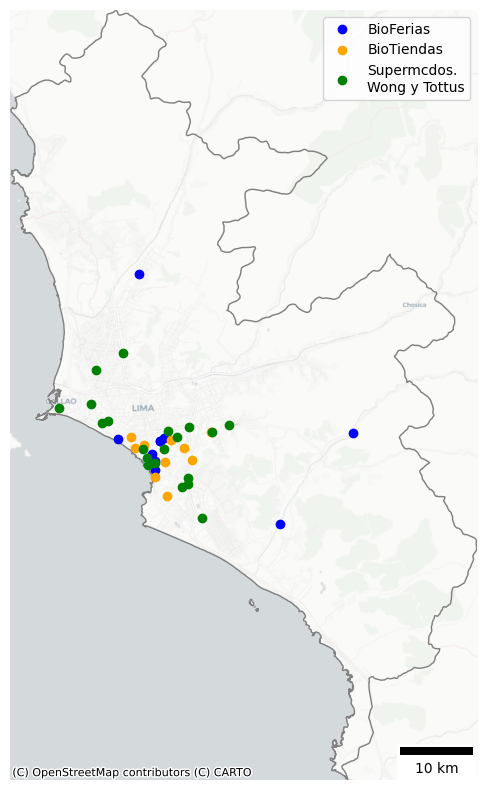

In [146]:
ax = lima_met_smooth_proj.plot(facecolor='none', edgecolor='grey', figsize=(10,10))

bioferias_gpd_proj.plot(ax=ax, color='b')
biotiendas_gpd_proj.plot(ax=ax, color='orange')
supermarkets_gpd_proj.plot(ax=ax, color='g')

minx, miny, maxx, maxy = lima_met_smooth_proj.total_bounds
margins = 100
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.add_artist(ScaleBar(1, location='lower right'))

b_patch = Line2D([0],[0], marker='o', color='b', linewidth=0, label='BioFerias')
orange_patch = Line2D([0],[0], marker='o', color='orange', linewidth=0, label='BioTiendas')
g_patch = Line2D([0],[0], marker='o', color='g', linewidth=0, label='Supermcdos.\nWong y Tottus')
plt.legend(handles=[b_patch, orange_patch, g_patch])

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs=UTM_CRS)

plt.savefig('outputs/producto_2/maps/oferta_alim_lima.png', 
            dpi=300, bbox_inches='tight')